# Data Science - Statistics

**We use statistics to distill and communicate relevant features of our data.**

## Describing a single set of data

One obvious description of any data set is simply the data itself:

Example: num_friends = [100, 49, 41, 40, 25]

In [19]:
num_friends = [1, 95, 53, 46, 33, 45, 43, 38, 56, 16, 54, 10, 47, 26, 46, 80, 17, 49, 34, 52,
 17, 55, 43, 55, 55, 43, 15, 48, 50, 54, 28, 60, 28, 46, 69, 70, 63, 21, 50, 21,
 57, 56, 24, 34, 44, 62, 60, 28, 21, 59, 41, 52, 79, 45, 27, 60, 59, 59, 30, 32,
 88, 1, 17, 34, 48, 42, 46, 31, 69, 55, 24, 32, 55, 61, 58, 55, 33, 53, 29, 72,
 25, 28, 57, 54, 44, 36, 41, 60, 53, 68, 26, 56, 37, 32, 59, 72, 62, 59, 37, 100]

print(num_friends)

[1, 95, 53, 46, 33, 45, 43, 38, 56, 16, 54, 10, 47, 26, 46, 80, 17, 49, 34, 52, 17, 55, 43, 55, 55, 43, 15, 48, 50, 54, 28, 60, 28, 46, 69, 70, 63, 21, 50, 21, 57, 56, 24, 34, 44, 62, 60, 28, 21, 59, 41, 52, 79, 45, 27, 60, 59, 59, 30, 32, 88, 1, 17, 34, 48, 42, 46, 31, 69, 55, 24, 32, 55, 61, 58, 55, 33, 53, 29, 72, 25, 28, 57, 54, 44, 36, 41, 60, 53, 68, 26, 56, 37, 32, 59, 72, 62, 59, 37, 100]


In [20]:
from collections import Counter

friend_counts = Counter(num_friends)

print(friend_counts)

Counter({55: 6, 59: 5, 46: 4, 28: 4, 60: 4, 53: 3, 43: 3, 56: 3, 54: 3, 17: 3, 34: 3, 21: 3, 32: 3, 1: 2, 33: 2, 45: 2, 26: 2, 52: 2, 48: 2, 50: 2, 69: 2, 57: 2, 24: 2, 44: 2, 62: 2, 41: 2, 72: 2, 37: 2, 95: 1, 38: 1, 16: 1, 10: 1, 47: 1, 80: 1, 49: 1, 15: 1, 70: 1, 63: 1, 79: 1, 27: 1, 30: 1, 88: 1, 42: 1, 31: 1, 61: 1, 58: 1, 29: 1, 25: 1, 36: 1, 68: 1, 100: 1})


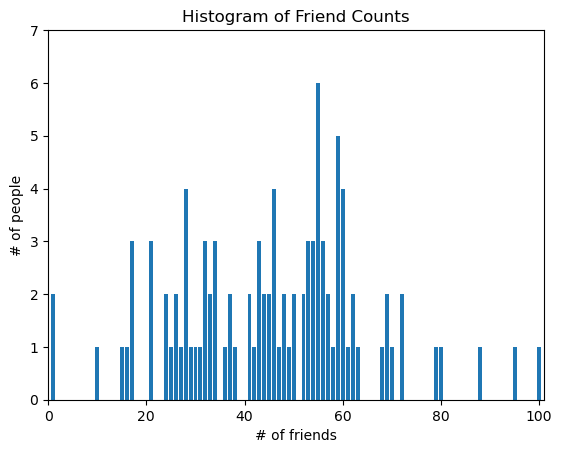

In [21]:
xs = range(101) # 0 to 100
ys = [friend_counts[x] for x in xs]

import matplotlib.pyplot as plt

plt.bar(xs, ys)
plt.axis([0,101, 0, 7])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

The chart is too difficult to interpret. Therefore, we can turn to the simplest statistics such as the number of data points, largest and smallest values.

In [22]:
num_points = len(num_friends)
largest_value = max(num_friends)
smallest_value = min(num_friends)
print("# of data points: ", num_points)
print("largest value: ", largest_value)
print("smallest value: ", smallest_value)

# of data points:  100
largest value:  100
smallest value:  1


## Central Tendencies

To understand the notion of where the data is centered, we use mean.

In [23]:
def mean(x):
    return sum(x) / len(x)

mean(num_friends)

45.7

**As you add more points, the mean shifts around, but it always depends on the value of every point.**

Median : middle-most value (if the number of data points is odd) or average of the two middle-most values (if the number of data points is even)

The median doesn’t depend on every value in your data. For example, if you make the largest point larger (or the smallest point smaller), the middle points remain unchanged, which means so does the median.

In [24]:
def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 0:
        return sorted_v[midpoint]
    else:
        return (sorted_v[midpoint-1]+sorted_v[midpoint]) /2
    
median(num_friends)

47

**The mean is very sensitive to outliers in our data. If our friendliest user had 200 friends (instead of 100), then the mean would rise, while the median would stay the same.**

A generalization of the median is the quantile, which represents the value less than which a certain percentile of the data lies. Median represents the value less than which 50% of the data lies.

In [26]:
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

quantile(num_friends, 0.50)

47

Mode is the most common value

In [27]:
def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

mode(num_friends)

[55]

## Dispersion

Dispersion refers to measures of how spread out the data is. Values near zero signifies not spread out and large values signify very spread out.

Range is one of the measure of dispersion which is difference between the largest and the smallest elements.

In [28]:
def data_range(x):
    return max(x) - min(x)

data_range(num_friends)

99

**Like the median, the range doesn’t really depend on the whole data set. A data set whose points are all either 0 or 100 has the same range as a data set whose values are 0, 100, and lots of 50s.**

A more complex measure of dispersion is the variance.

In [29]:
def de_mean(x):
    x_bar = mean(x)
    return [xi - x_bar for xi in x] # subtracting the mean from each element of x so that result has 0 mean
print("The mean is: ", mean(num_friends))
print(sorted(de_mean(num_friends)))

The mean is:  45.7
[-44.7, -44.7, -35.7, -30.700000000000003, -29.700000000000003, -28.700000000000003, -28.700000000000003, -28.700000000000003, -24.700000000000003, -24.700000000000003, -24.700000000000003, -21.700000000000003, -21.700000000000003, -20.700000000000003, -19.700000000000003, -19.700000000000003, -18.700000000000003, -17.700000000000003, -17.700000000000003, -17.700000000000003, -17.700000000000003, -16.700000000000003, -15.700000000000003, -14.700000000000003, -13.700000000000003, -13.700000000000003, -13.700000000000003, -12.700000000000003, -12.700000000000003, -11.700000000000003, -11.700000000000003, -11.700000000000003, -9.700000000000003, -8.700000000000003, -8.700000000000003, -7.700000000000003, -4.700000000000003, -4.700000000000003, -3.700000000000003, -2.700000000000003, -2.700000000000003, -2.700000000000003, -1.7000000000000028, -1.7000000000000028, -0.7000000000000028, -0.7000000000000028, 0.29999999999999716, 0.29999999999999716, 0.29999999999999716, 0.2

In [30]:
def sum_of_squares(x):
    return sum([xi**2 for xi in x])

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n-1)

variance(num_friends)

354.57575757575756

**Standard deviation**

In [31]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

18.830182090881586

**If our friendliest user had instead 200 friends, the standard deviation would be 14.89, more than 60% higher!**

A more robust alternative computes the difference between 75th and 25th percentile (interquartile range)

In [32]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

26

Mean, range, variance and standard deviation are impacted by the magnitude of the data points.

## Correlation

Whereas variance measures how a single variable deviates from its mean, covariance measures how two variables vary in tandem from their means.

In [33]:
def dot(v, w):
    return sum(v * w for v, w in zip(v, w))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

daily_minutes = [10, 32, 85, 51, 89, 122, 89, 108, 39, 107, 44, 115, 44, 43, 103, 83, 131, 103,
 119, 10, 106, 78, 105, 126, 92, 63, 60, 47, 102, 36, 57, 34, 99, 105, 105, 105,
 60, 79, 116, 113, 117, 101, 123, 38, 200, 65, 142, 163, 91, 53, 95, 41, 64, 96,
 80, 106, 73, 103, 68, 118, 125, 60, 47, 59, 81, 98, 55, 150, 90, 119, 89, 126,
 85, 76, 130, 98, 72, 134, 142, 162, 89, 109, 32, 98, 92, 62, 95, 87, 47, 44, 111,
 79, 41, 33, 126, 63, 91, 79, 154, 200]

covariance(num_friends, daily_minutes)

34.046464646464635

Recall that dot sums up the products of corresponding pairs of elements. When corresponding elements of x and y are either both above their means or both below their means, a positive number enters the sum. When one is above its mean and the other below, a negative number enters the sum. Accordingly, a “large” positive covariance means that x tends to be large when y is large and small when y is small. A “large” negative covariance means the opposite—that x tends to be small when y is large and vice versa. A covariance close to zero means that no such relationship exists.

Covariance is hard to interpret because:
1. It's units are a product of the inputs (x and y) which might not make sense in every case.
2. If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large. But in a sense the variables would be just as interrelated. Said differently, it’s hard to say what counts as a “large” covariance.

The statement about covariance can be broken down into several key points to better understand its meaning:

- Covariance Measures Linear Relationship: Covariance is a statistical measure that indicates the extent to which two variables change together. A positive covariance means that as one variable increases, the other tends to increase as well, and vice versa for a negative covariance.

- Scaling Effect on Covariance: When the statement says, "If each user had twice as many friends (but the same number of minutes), the covariance would be twice as large," it highlights that covariance is sensitive to the scale of the variables. If you multiply one of the variables by a constant factor (e.g., doubling the number of friends), the covariance also changes by that factor. Mathematically, if 

1. 𝑋 is the number of friends and 
2. 𝑌 is the number of minutes spent, and we scale 
3. 𝑋 by 2 (i.e., 𝑋′ = 2𝑋), then the new covariance Cov(𝑋′, 𝑌) = 2Cov(𝑋, 𝑌)

Interrelatedness of Variables: The statement "But in a sense the variables would be just as interrelated" means that despite the change in scale, the underlying relationship between the variables remains the same. The doubling of friends does not change how the number of friends and minutes are related to each other; it only changes the magnitude of the covariance.

Relative Nature of Covariance: "It’s hard to say what counts as a 'large' covariance" points out that the absolute value of covariance is not inherently meaningful without context. Since covariance depends on the units and scales of the variables, a "large" covariance in one context might not be large in another. For instance, doubling the number of friends increases the covariance, but this doesn't imply a stronger relationship between the variables—only that the scale has changed.

In [34]:
# Correlation

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y)/ stdev_x / stdev_y
    else:
        return 0
    
correlation(num_friends, daily_minutes)

0.04866567119567395

The correlation is unitless and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). Correlation can be very sensitive to outliers.

In [37]:
outlier = num_friends.index(100)
num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

correlation(num_friends_good, daily_minutes_good)

-0.04318484489532695

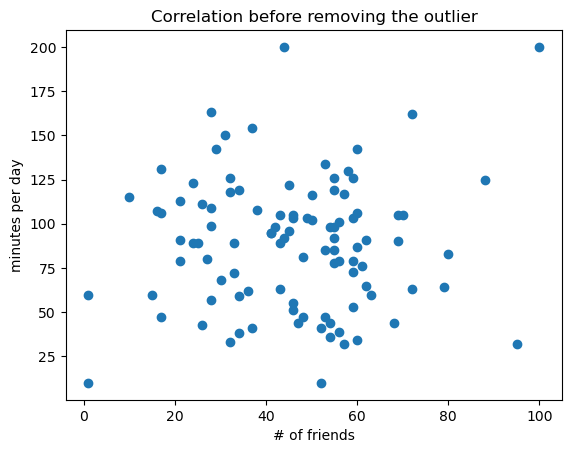

In [42]:
plt.scatter(num_friends, daily_minutes)
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.title("Correlation before removing the outlier")
plt.show()

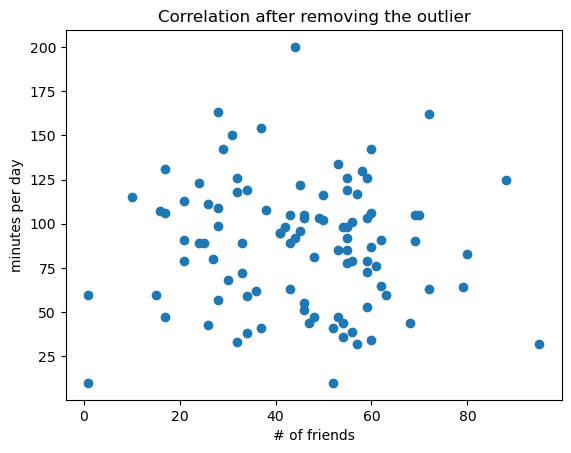

In [41]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.title("Correlation after removing the outlier")
plt.show()

Correlation looks at whether there is a consistent relationship between the deviations. Specifically, it examines whether:

- When 𝑥𝑖​  is above the mean of 𝑥 (i.e., 𝑥𝑖 − mean(𝑥) > 0, 𝑦𝑖​  also tends to be above the mean of 𝑦 (i.e. 𝑦𝑖 − mean(𝑦) > 0)
- When 𝑥𝑖​  is below the mean of 𝑥 (i.e., 𝑥𝑖 − mean(𝑥) < 0, 𝑦𝑖​  also tends to be below the mean of 𝑦 (i.e. 𝑦𝑖 − mean(𝑦) < 0) 

If this pattern holds consistently, then 𝑥 and 𝑦 are positively correlated. If the opposite pattern holds (i.e., when 𝑥𝑖​ is above the mean of 𝑥, 𝑦𝑖​ is below the mean of 𝑦, and vice versa), then 𝑥 and 𝑦 are negatively correlated.

Correlation is quantitatively measured by the Pearson correlation coefficient, 𝑟, which is defined as:

$𝑟 = {\sum (𝑥𝑖 − mean(𝑥))(𝑦𝑖 − mean(𝑦)) \over \sqrt{\sum (𝑥𝑖 − mean(𝑥))^2 \sum (𝑦𝑖 − mean(𝑦))^2}}$

Here’s what this formula tells us:

- The numerator, , sums the products of the deviations of 𝑥 and 𝑦. This captures whether 𝑥 and 𝑦 tend to move together (positive correlation) or in opposite directions (negative correlation).

- The denominator normalizes this sum by the product of the standard deviations of 𝑥 and 𝑦, ensuring that 𝑟 is dimensionless and ranges between -1 and 1.

## Simpson's Paradox

**Correlations can be misleading when confounding variables are ignored.**

Simpson's Paradox illustrates the complexity of interpreting statistical data and the potential for misleading conclusions when aggregating data without considering underlying group structures and confounding variables. It emphasizes the need for careful analysis and a deep understanding of the data to uncover true relationships.

Example: Ice Cream Sales and Drowning Incidents

- Scenario: It has been observed that there is a positive correlation between ice cream sales and drowning incidents.

- Misleading Interpretation: One might hastily conclude that eating ice cream causes drowning.

- Confounding Variable: The confounding variable here is the temperature. During the summer months, higher temperatures lead to more people buying ice cream and also more people swimming, which increases the risk of drowning incidents.

- Correct Understanding: Both ice cream sales and drowning incidents are related to the weather (temperature), not to each other directly.